In [1]:
# define libraries to use
import numpy as np
import pandas as pd

#from pathlib import Path
import requests,json
import matplotlib.pyplot as plt
#import matplotlib.ticker as ticker
#import scipy as sp
#%matplotlib inline

In [13]:
def GoodVPICDecode(picDecodeResult):
	return (picDecodeResult in {'0','0,10','1,10','1,400','1,10,400'})

In [2]:
nydmvVinColumns = [ 
    'entry', 'ORIG_VIN', 'ABS', 'AdaptiveCruiseControl', 'AdaptiveDrivingBeam', 'AdaptiveHeadlights', 'AutoReverseSystem', 
    'AutomaticPedestrianAlertingSound', 'BlindSpotIntervention', 'BlindSpotMon', 'BodyClass', 'CIB', 'CurbWeightLB', 
    'DaytimeRunningLight', 'Doors', 'DriverAssist', 'DynamicBrakeSupport', 'EDR', 'ESC', 'ErrorCode', 'ForwardCollisionWarning', 
    'GCWR', 'GCWR_to', 'GVWR', 'GVWR_to', 'LaneCenteringAssistance', 'LaneDepartureWarning', 'LaneKeepSystem', 'LowerBeamHeadlampLightSource', 
    'Make', 'MakeID', 'Manufacturer', 'ManufacturerId', 'Model', 'ModelID', 'ModelYear', 'NCSABodyType', 'NCSAMake', 'NCSAModel', 'ParkAssist', 
    'PedestrianAutomaticEmergencyBraking', 'RearAutomaticEmergencyBraking', 'RearCrossTrafficAlert', 'Seats', 'SemiautomaticHeadlampBeamSwitching', 'Series',
    'Series2', 'SuggestedVIN', 'TPMS', 'TractionControl', 'Trim', 'Trim2', 'VIN', 'VehicleType', 
]

nydmvVinStyCols = [ 
    'ABS', 'AdaptiveCruiseControl', 'AdaptiveDrivingBeam',  'AutomaticPedestrianAlertingSound', 'BlindSpotIntervention', 'BlindSpotMon', 'CIB', 
    'DaytimeRunningLight', 'DynamicBrakeSupport', 'ESC', 'ForwardCollisionWarning', 
    'LaneCenteringAssistance', 'LaneDepartureWarning', 'LaneKeepSystem', 'LowerBeamHeadlampLightSource', 
    'ParkAssist', 
    'PedestrianAutomaticEmergencyBraking', 'RearAutomaticEmergencyBraking', 'RearCrossTrafficAlert', 'SemiautomaticHeadlampBeamSwitching', 
    'TPMS', 'TractionControl', 
]

nydmvVinDecodeDf = pd.read_csv("tmp/nydmvvin-goodhdr/NYDMV-VIN-OUTPUT-merged-fixedquotes-cols.csv",low_memory=False)


In [3]:
nydmvVinDecodeDf.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11350715 entries, 0 to 11350714
Data columns (total 55 columns):
 #   Column                               Non-Null Count     Dtype  
---  ------                               --------------     -----  
 0   entry                                11350715 non-null  int64  
 1   ORIG_VIN                             11350709 non-null  object 
 2   ABS                                  4021045 non-null   object 
 3   AdaptiveCruiseControl                2516576 non-null   object 
 4   AdaptiveDrivingBeam                  1729360 non-null   object 
 5   AdaptiveHeadlights                   0 non-null         float64
 6   AutoReverseSystem                    3976849 non-null   object 
 7   AutomaticPedestrianAlertingSound     714574 non-null    object 
 8   BlindSpotIntervention                119627 non-null    object 
 9   BlindSpotMon                         2889630 non-null   object 
 10  BodyClass                            11102414 non-nu

In [4]:
nydmvVinDecodeDf["AdaptiveCruiseControl"].value_counts().sort_values(ascending=False)

Standard          1372226
Optional           686530
Not Applicable     439778
Not Available       18042
Name: AdaptiveCruiseControl, dtype: int64

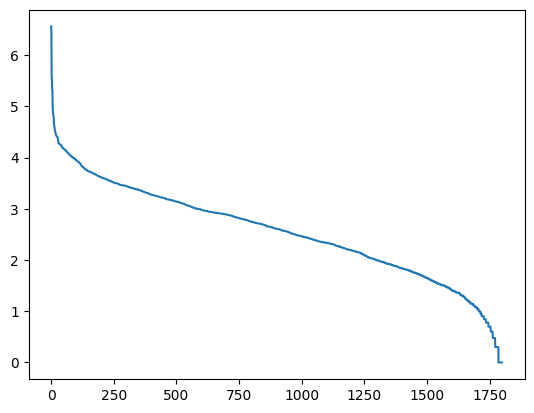

In [5]:
ccc = nydmvVinDecodeDf.value_counts(subset=nydmvVinStyCols,dropna=False).sort_values(ascending=False)
x = ccc.values
plt.plot(np.log10(x))
#plt.hist(x,log=True)

In [6]:
for col in nydmvVinStyCols:
    print(col.ljust(max([len(x) for x in nydmvVinStyCols])+4),list(nydmvVinDecodeDf[col].unique()))

ABS                                     [nan, 'Not Applicable', 'Standard', 'Not Available', 'Optional']
AdaptiveCruiseControl                   [nan, 'Not Applicable', 'Standard', 'Optional', 'Not Available']
AdaptiveDrivingBeam                     [nan, 'Not Applicable', 'Standard', 'Optional', 'Not Available']
AutomaticPedestrianAlertingSound        [nan, 'Not Applicable', 'Standard', 'Not Available', 'Optional']
BlindSpotIntervention                   [nan, 'Standard', 'Optional']
BlindSpotMon                            [nan, 'Not Applicable', 'Standard', 'Optional', 'Not Available']
CIB                                     [nan, 'Not Applicable', 'Standard', 'Not Available', 'Optional']
DaytimeRunningLight                     [nan, 'Not Applicable', 'Standard', 'Optional', 'Not Available']
DynamicBrakeSupport                     [nan, 'Not Applicable', 'Standard', 'Not Available', 'Optional']
ESC                                     [nan, 'Not Applicable', 'Standard']
ForwardCollisi

From DataAnalysis-fars
```
AdaptiveCruiseControlId              {nan: nan, 1.0: 'Standard', 0.0: 'Not Applicable', 3.0: 'Optional', 2.0: 'Not Available'}
AdaptiveDrivingBeamId                {nan: nan, 1.0: 'Standard', 0.0: 'Not Applicable', 3.0: 'Optional', 2.0: 'Not Available'}
AntilockBrakeSystemId                {nan: nan, 1.0: 'Standard', 3.0: 'Optional', 2.0: 'Not Available'}
AutoPedestrianAlertingSoundId        {nan: nan, 0.0: 'Not Applicable', 2.0: 'Not Available', 1.0: 'Standard', 3.0: 'Optional'}
BackupCameraId                       {nan: nan, 1.0: 'Standard', 3.0: 'Optional', 0.0: 'Not Applicable', 2.0: 'Not Available'}
BlindSpotInterventionId              {nan: nan}
BlindSpotWarningId                   {nan: nan, 1.0: 'Standard', 3.0: 'Optional', 0.0: 'Not Applicable', 2.0: 'Not Available'}
CrashImminentBrakingID               {nan: nan, 1.0: 'Standard', 0.0: 'Not Applicable', 3.0: 'Optional', 2.0: 'Not Available'}
DaytimeRunningLightId                {nan: nan, 3.0: 'Optional', 1.0: 'Standard', 0.0: 'Not Applicable', 2.0: 'Not Available'}
DynamicBrakeSupportId                {nan: nan, 1.0: 'Standard', 0.0: 'Not Applicable', 3.0: 'Optional', 2.0: 'Not Available'}
ElectronicStabilityControlId         {nan: nan, 1.0: 'Standard'}
ForwardCollisionWarningId            {nan: nan, 1.0: 'Standard', 0.0: 'Not Applicable', 3.0: 'Optional', 2.0: 'Not Available'}
LaneCenteringAssistanceId            {nan: nan, 1.0: 'Standard', 3.0: 'Optional'}
LaneDepartureWarningId               {nan: nan, 1.0: 'Standard', 0.0: 'Not Applicable', 3.0: 'Optional', 2.0: 'Not Available'}
LaneKeepingAssistanceId              {nan: nan, 1.0: 'Standard', 0.0: 'Not Applicable', 4.0: 'Not Available', 5.0: 'Optional'}
ParkAssistId                         {nan: nan, 1.0: 'Standard', 0.0: 'Not Applicable', 2.0: 'Not Available', 3.0: 'Optional'}
PedestrianAutoEmergencyBrakingId     {nan: nan, 0.0: 'Not Applicable', 1.0: 'Standard', 3.0: 'Optional', 2.0: 'Not Available'}
RearAutomaticEmergencyBrakingId      {nan: nan}
RearCrossTrafficAlertId              {nan: nan, 0.0: 'Not Applicable', 1.0: 'Standard', 2.0: 'Optional', 3.0: 'Not Available'}
SemiAutoHeadlampBeamSwitchingId      {nan: nan, 1.0: 'Standard', 0.0: 'Not Applicable', 3.0: 'Optional', 2.0: 'Not Available'}
TPMSId                               {nan: nan, 1.0: 'Direct', 2.0: 'Indirect', 0.0: 'Not Applicable'}
TractionControlId                    {nan: nan, 1.0: 'Standard', 3.0: 'Optional'}
```

In [39]:
safetyCatMost     = {np.nan: np.nan, 'Not Applicable' : 0, 'Standard' : 1 , 'Not Available' : 2 , 'Optional' : 3  }
safetyCatLKA      = {np.nan: np.nan, 'Not Applicable' : 0, 'Standard' : 1 , 'Not Available' : 4 , 'Optional' : 5  } 
safetyCatTPMS     = {np.nan: np.nan, 'Not Applicable' : 0, 'Direct'   : 1 , 'Indirect'      : 2 } 
safetyCatHdLmpSrc = {np.nan: np.nan, 'Not Applicable' : 0, 'Halogen'  : 1 , 'HID'           : 2 , 'LED'     : 3 , 
                                     'Other' : 4, 'Halogen, HID' : 5, 'Halogen, LED' : 6, 'Halogen, Other' : 7, 
                                     'HID, LED' : 8, 'HID, Other' : 9, 'LED, Other' : 10, 'Halogen, HID, LED' : 11,
                                     'Halogen, HID, Other' : 12, 'Halogen, LED, Other' : 13, 'HID, LED, Other' : 14, 
                                     'Halogen, HID, LED, Other' : 15, 'Laser' : 16,}

safetyColMap = {
    'ABS' : 'AntilockBrakeSystemId',
    'AdaptiveCruiseControl' : 'AdaptiveCruiseControlId',
    'AdaptiveDrivingBeam' : 'AdaptiveDrivingBeamId',
    'AutomaticPedestrianAlertingSound' : 'AutoPedestrianAlertingSoundId',
    'BlindSpotIntervention' : 'BlindSpotInterventionId',
    'BlindSpotMon' : 'BlindSpotWarningId',
    'CIB' : 'CrashImminentBrakingID',
    'DaytimeRunningLight' : 'DaytimeRunningLightId',
    'DynamicBrakeSupport' : 'DynamicBrakeSupportId',
    'ESC' : 'ElectronicStabilityControlId',
    'ForwardCollisionWarning' : 'ForwardCollisionWarningId',
    'LaneCenteringAssistance' : 'LaneCenteringAssistanceId',
    'LaneDepartureWarning' : 'LaneDepartureWarningId',
    'LaneKeepSystem' : 'LaneKeepingAssistanceId',
    'LowerBeamHeadlampLightSource' : 'HeadlampLightSourceId',
    'ParkAssist' : 'ParkAssistId',
    'PedestrianAutomaticEmergencyBraking' : 'PedestrianAutoEmergencyBrakingId',
    'RearAutomaticEmergencyBraking' : 'RearAutomaticEmergencyBrakingId',
    'RearCrossTrafficAlert' : 'RearCrossTrafficAlertId',
    'SemiautomaticHeadlampBeamSwitching' : 'SemiAutoHeadlampBeamSwitchingId',
    'TPMS' : 'TPMSId',
    'TractionControl' : 'TractionControlId',
}

for col in safetyColMap.keys():
    newCol = safetyColMap[col]
    print(newCol,":",col,end="")
    if col == 'TPMS':
        nydmvVinDecodeDf[newCol] = nydmvVinDecodeDf.apply(lambda row: safetyCatTPMS[row[col]],axis=1)
    elif col == 'LaneKeepSystem':
        nydmvVinDecodeDf[newCol] = nydmvVinDecodeDf.apply(lambda row: safetyCatLKA[row[col]],axis=1)
    elif col == 'LowerBeamHeadlampLightSource':
        nydmvVinDecodeDf[newCol] = nydmvVinDecodeDf.apply(lambda row: safetyCatHdLmpSrc[row[col]],axis=1)
    else:
        nydmvVinDecodeDf[newCol] = nydmvVinDecodeDf.apply(lambda row: safetyCatMost[row[col]],axis=1)
    nydmvVinDecodeDf.drop(columns=col,inplace=True)
    print("\r"," "*80,end="\r")
print()

for col in safetyColMap.values():
    print(col.ljust(max([len(x) for x in safetyColMap.values()])+4),list(nydmvVinDecodeDf[col].unique()))

# idenfity columns with valid decodes
nydmvVinDecodeDf["GoodVPICDecode"] = nydmvVinDecodeDf.apply(lambda row: GoodVPICDecode(row["ErrorCode"]),axis=1)

# drop unneccesary columns
#  AutoReverseSystem -> An auto-reverse system enables power windows and sunroofs on motor vehicles to automatically reverse direction when such power windows and panels detect an obstruction
#  GCWR, GCWR_to     -> all null values, Gross Combination Weight Rating (From and To); Gross combination weight rating (GCWR) is the maximum allowable combined mass of a road vehicle, 
#                       the passengers and cargo in the tow vehicle, plus the mass of the trailer and cargo in the trailer. 
#  Make              -> Keep MakeID
#  Model             -> Keep ModelID
#  Manufacturer, ManufacturerId -> Make will be used instead
#  NCSABodyType, NCSAMake, NCSAModel -> all null
#  EDR               -> Event Data Recorder, not a preventitive feature


nydmvVinDecodeDf.drop(columns=["AutoReverseSystem","GCWR","GCWR_to","Make","Model","Manufacturer","ManufacturerId","NCSABodyType", "NCSAMake", "NCSAModel", "EDR"],inplace=True)

catDic = {}

# additional categories to correct
catDic["VehicleType"] = {
    np.nan: np.nan,
    'BUS': 5 ,
    'INCOMPLETE VEHICLE': 10 ,
    'LOW SPEED VEHICLE (LSV)': 9 ,
    'MOTORCYCLE': 1 ,
    'MULTIPURPOSE PASSENGER VEHICLE (MPV)': 7 ,
    'OFF ROAD VEHICLE': 13 ,
    'PASSENGER CAR': 2 ,
    'TRAILER': 6 ,
    'TRUCK': 3
}

catDic["GVWR"] = {
    np.nan: np.nan,
    'Class 1: 6,000 lb or less (2,722 kg or less)': 1 ,
    'Class 1A: 3,000 lb or less (1,360 kg or less)': 10 ,
    'Class 1B: 3,001 - 4,000 lb (1,360 - 1,814 kg)': 11 ,
    'Class 1C: 4,001 - 5,000 lb (1,814 - 2,268 kg)': 12 ,
    'Class 1D: 5,001 - 6,000 lb (2,268 - 2,722 kg)': 13 ,
    'Class 2: 6,001 - 10,000 lb (2,722 - 4,536 kg)': 2 ,
    'Class 2E: 6,001 - 7,000 lb (2,722 - 3,175 kg)': 14 ,
    'Class 2F: 7,001 - 8,000 lb (3,175 - 3,629 kg)': 15 ,
    'Class 2G: 8,001 - 9,000 lb (3,629 - 4,082 kg)': 16 ,
    'Class 2H: 9,001 - 10,000 lb (4,082 - 4,536 kg)': 17 ,
    'Class 3: 10,001 - 14,000 lb (4,536 - 6,350 kg)': 4 ,
    'Class 4: 14,001 - 16,000 lb (6,350 - 7,258 kg)': 5 ,
    'Class 5: 16,001 - 19,500 lb (7,258 - 8,845 kg)': 6 ,
    'Class 6: 19,501 - 26,000 lb (8,845 - 11,794 kg)': 7 ,
    'Class 7: 26,001 - 33,000 lb (11,794 - 14,969 kg)': 8 ,
    'Class 8: 33,001 lb and above (14,969 kg and above)': 9 ,
}

catDic["GVWR_to"] = catDic["GVWR"]

otherColMap = {
    "VehicleType" : "VehicleTypeId",
    "GVWR" : "GrossVehicleWeightRatingFromId",
    "GVWR_to" : "GrossVehicleWeightRatingToId"
}

for col in otherColMap.keys():
    newCol = otherColMap[col]
    print(" "*80,"\rOTHER ",newCol,":",col,end="")
    nydmvVinDecodeDf[newCol] = nydmvVinDecodeDf.apply(lambda row: catDic[col][row[col].strip() if isinstance(row[col],str) else row[col]],axis=1)
    nydmvVinDecodeDf.drop(columns=col,inplace=True)
    print(end="\r")
print()


nydmvVinDecodeDf["MakeID"] = nydmvVinDecodeDf["MakeID"].astype("float")


SyntaxError: invalid syntax (3059508070.py, line 115)

In [56]:
nydmvVinDecodeDf.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11350715 entries, 0 to 11350714
Data columns (total 45 columns):
 #   Column                            Non-Null Count     Dtype  
---  ------                            --------------     -----  
 0   entry                             11350715 non-null  int64  
 1   ORIG_VIN                          11350709 non-null  object 
 2   AdaptiveHeadlights                0 non-null         float64
 3   BodyClass                         11102414 non-null  object 
 4   CurbWeightLB                      168899 non-null    float64
 5   Doors                             8836265 non-null   float64
 6   DriverAssist                      0 non-null         float64
 7   EngineCylinders                   9948597 non-null   float64
 8   ErrorCode                         11350715 non-null  object 
 9   MakeID                            11179131 non-null  float64
 10  ModelID                           11098895 non-null  float64
 11  ModelYear             

In [64]:
nydmvVinDecodeDf[(nydmvVinDecodeDf["VIN"] != nydmvVinDecodeDf["ORIG_VIN"])][["ORIG_VIN","VIN"]].dropna(subset=["ORIG_VIN"])

,ORIG_VIN,VIN
8381063,ZDM14BYW9FB025865,NaN
8381064,ZDM14BYW9FB025817,NaN
8381065,ZDM14BYW9FB002103,NaN
8381068,ZDM14BYW8FB025775,NaN
8381069,ZDM14BYW8FB002223,NaN
...,...,...
8383429,ZDM1RBSW0EB003049,NaN
8383430,ZDM1RBSW0EB002919,NaN
8383431,ZDM1RBSW0EB002872,NaN
8383433,ZDM1RBSWXFB013704,NaN


In [65]:
nydmvVinDecodeDf[nydmvVinDecodeDf["ORIG_VIN"].isna()]

,entry,ORIG_VIN,AdaptiveHeadlights,BodyClass,CurbWeightLB,Doors,DriverAssist,EngineCylinders,ErrorCode,MakeID,...,PedestrianAutoEmergencyBrakingId,RearAutomaticEmergencyBrakingId,RearCrossTrafficAlertId,SemiAutoHeadlampBeamSwitchingId,TPMSId,TractionControlId,GoodVPICDecode,GrossVehicleWeightRatingFromId,GrossVehicleWeightRatingToId,VehicleTypeId
11350709,12586517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6,7,11,400",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
11350710,12586521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6,7,11,400",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
11350711,12586534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6,7,11,400",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
11350712,12586572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6,7,11,400",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
11350713,12586644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6,7,11,400",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
11350714,12586700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6,7,11,400",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
